In [4]:
# -*- coding: utf-8 -*-
"""
Created on Sun august 21 14:35:15 2016
@author: Sidon
"""
%matplotlib inline
import pandas as pd
import numpy as np
from collections import OrderedDict
from tabulate import tabulate, tabulate_formats
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats

# bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%f'%x)

# Load from CSV
data1 = pd.read_csv('~/dev/coursera/gapminder.csv', skip_blank_lines=True,
                    usecols=['country','alcconsumption', 'lifeexpectancy'])
 
# Rename columns for clarity                                    
data1.columns = ['country','alcohol','life']

# Variables Descriptions
ALCOHOL = "2008 alcohol consumption per adult (liters, age 15+)"
LIFE = "2011 life expectancy at birth (years)"

# converting to numeric values and parsing (numeric invalids=NaN)
for dt in ('alcohol','life') :
   data1[dt] = pd.to_numeric(data1[dt], 'errors=coerce') 

# Remove rows with nan values
data1 = data1.dropna(axis=0, how='any')

# Copy dataframe for univariate categorical variables
data2 = data1.copy()

In [5]:
r1 = scipy.stats.pearsonr(data1['life'], data1['alcohol'])
r1 = list(r1)
r1.insert(2,r1[0]*r1[0])
print (tabulate([r1], tablefmt="fancy_grid", 
                headers=['Correlation coefficient', 'P-value', 'r²'] ))

╒═══════════════════════════╤═════════════╤═══════════╕
│   Correlation coefficient │     P-value │        r² │
╞═══════════════════════════╪═════════════╪═══════════╡
│                  0.312994 │ 2.34203e-05 │ 0.0979652 │
╘═══════════════════════════╧═════════════╧═══════════╛


The correlation is approximately 0.31 with a very small p-value, this indicate that the realationship
is statistically signficant.

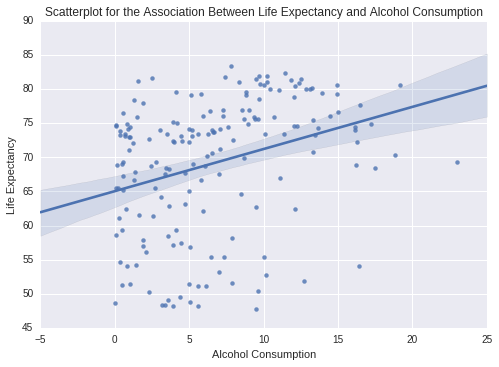

In [6]:
# basic scatterplot Q->Q
sn.set(style="darkgrid", color_codes=True)
scat1 = sn.regplot(x="alcohol", y="life", fit_reg=True, data=data1)
plt.xlabel('Alcohol Consumption')
plt.ylabel('Life Expectancy')
plt.title('Scatterplot for the Association Between Life Expectancy and Alcohol Consumption')
plt.show()